In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [73]:
df= pd.read_csv("data/bank-additional.csv", sep=";")

In [74]:
# duration sütununu çıkaralım
# dataset açıklamasında geçtiği üzere
df= df.drop("duration", axis=1)

**Exploratory Data Analysis (EDA)**

In [75]:
# verinin şekli
df.shape

(4119, 20)

In [76]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [77]:
col_names= df.columns
col_names

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [78]:
# target variable'ın dağılımı
df['y'].value_counts()

y
no     3668
yes     451
Name: count, dtype: int64

In [79]:
# sınıfların (yes-no) yüzde dağılımını görelim
df["y"].value_counts() / float(len(df))

y
no     0.890507
yes    0.109493
Name: count, dtype: float64

In [80]:
#unbalanced olan bu verinin içeriğni bi görelim
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  campaign        4119 non-null   int64  
 11  pdays           4119 non-null   int64  
 12  previous        4119 non-null   int64  
 13  poutcome        4119 non-null   object 
 14  emp.var.rate    4119 non-null   float64
 15  cons.price.idx  4119 non-null   float64
 16  cons.conf.idx   4119 non-null   float64
 17  euribor3m       4119 non-null   f

In [81]:
#info da eksik veri gözükmüyor ama yine kontrol edelim
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [82]:
#toplam sütun sayısı
len(df.columns)

20

In [83]:
#numeric sütunların adedi
df.select_dtypes(include=["int64", "float64"]).shape

(4119, 9)

In [84]:
#numeric sütunlar
numeric_col= df.select_dtypes(include=["int64", "float64"]).columns
numeric_col

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [85]:
# kategorik kolonların (object) adedi
df.select_dtypes(include=["object"]).shape

(4119, 11)

In [86]:
# kategorik kolonlar
cat_col= df.select_dtypes(include=["object"]).columns
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

**Numerik Değişkenler**

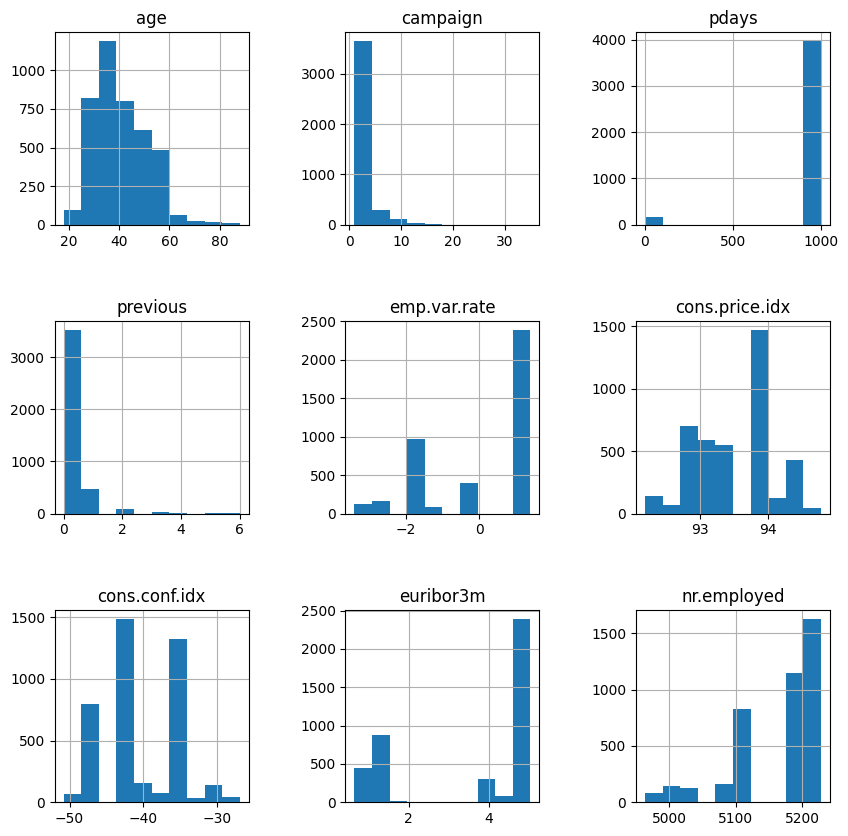

In [87]:
#numerik değişkenlerin dağılımına bakalım
df.hist(column=numeric_col, figsize=(10,10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

**Ordinal Değişkenler**

In [88]:
df["poutcome"].value_counts()

poutcome
nonexistent    3523
failure         454
success         142
Name: count, dtype: int64

In [89]:
df["poutcome"]= df["poutcome"].map({"failure": -1, "nonexistent": 0, "success": 1})

In [90]:
df["poutcome"].value_counts()

poutcome
 0    3523
-1     454
 1     142
Name: count, dtype: int64

In [91]:
df["default"].value_counts()

default
no         3315
unknown     803
yes           1
Name: count, dtype: int64

In [92]:
df['default'] = df['default'].map({'yes': -1,'unknown': 0,'no': 1})

In [93]:
df["default"].value_counts()

default
 1    3315
 0     803
-1       1
Name: count, dtype: int64

In [94]:
#diğer kalan sütunlar
df['housing'] = df['housing'].map({'yes': -1,'unknown': 0,'no': 1})
df['loan'] = df['loan'].map({'yes': -1,'unknown': 0,'no': 1})

**Nominal Değişkenler**

In [95]:
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [96]:
#Diğer kategorik sütunları one-hot encoding yaparak numeic yapcağız
print("shape=",df.shape,"\n","columns=",df.columns)

shape= (4119, 20) 
 columns= Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [97]:
df= pd.get_dummies(df, columns=nominal)

In [98]:
print("shape=",df.shape,"\n","columns=",df.columns)

shape= (4119, 55) 
 columns= Index(['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
    

In [99]:
#target variable olan yyi encode edelim.
df["y"]= df["y"].map({"yes":1, "no":0})
df.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,30,1,-1,1,2,999,0,0,-1.8,92.893,...,False,True,False,False,False,True,False,False,False,False
1,39,1,1,1,4,999,0,0,1.1,93.994,...,False,True,False,False,False,True,False,False,False,False
2,25,1,-1,1,1,999,0,0,1.4,94.465,...,False,False,False,False,False,False,False,False,False,True
3,38,1,0,0,3,999,0,0,1.4,94.465,...,False,False,False,False,False,True,False,False,False,False
4,47,1,-1,1,1,999,0,0,-0.1,93.200,...,False,False,True,False,False,False,True,False,False,False


**Feature Vector & Target Variable**

In [100]:
X= df.drop(["y"], axis=1)
y= df["y"]

In [101]:
X.shape

(4119, 54)

In [102]:
y.shape

(4119,)

**Train-Test Split**

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [104]:
# X_train ve X_test şekilleri
X_train.shape , X_test.shape

((3295, 54), (824, 54))

**Feature Scaling**

In [105]:
# X_train sütunlarını tut
cols= X_train.columns

In [106]:
#Numerik sütunlar için Feature Scaling yapmamız lazım.
X_train[numeric_col]

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
3199,30,2,999,0,1.1,93.994,-36.4,4.856,5191.0
3258,42,2,999,0,1.4,93.444,-36.1,4.968,5228.1
3153,48,1,999,0,-0.1,93.200,-42.0,4.191,5195.8
399,30,2,999,1,-0.1,93.200,-42.0,4.021,5195.8
1410,28,1,999,0,-1.8,92.893,-46.2,1.291,5099.1
...,...,...,...,...,...,...,...,...,...
1033,50,17,999,0,1.4,94.465,-41.8,4.961,5228.1
3264,45,3,999,0,1.4,93.918,-42.7,4.961,5228.1
1653,27,2,999,0,-2.9,92.201,-31.4,0.879,5076.2
2607,56,3,999,0,1.4,93.918,-42.7,4.962,5228.1


In [107]:
# StandardScaler yarat
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

# X_train üzerinde fit ve transform yap
X_train= scaler.fit_transform(X_train)

# X_test'i transform yap
X_test= scaler.transform(X_test)

In [108]:
# StandardScaler transform sonrası veri yapıları değişir
type(X_train)

numpy.ndarray

In [109]:
# geri pandas.DataFrame'e çevirmemiz lazım

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [110]:
# veriler (scale edilmiş halde)
X_train[cols]

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,-0.977249,0.491928,-0.917247,0.464636,-0.195607,0.204284,-0.356918,0.200672,0.656694,0.724940,...,-0.109444,1.418409,-0.355121,-0.12413,-0.126628,-0.475204,-0.514189,-0.510412,1.951978,-0.487638
1,0.179962,0.491928,-0.917247,0.464636,-0.195607,0.204284,-0.356918,0.200672,0.848657,-0.225414,...,-0.109444,-0.705015,-0.355121,-0.12413,-0.126628,-0.475204,-0.514189,-0.510412,1.951978,-0.487638
2,0.758567,0.491928,-0.917247,0.464636,-0.587892,0.204284,-0.356918,0.200672,-0.111158,-0.647026,...,-0.109444,-0.705015,2.815944,-0.12413,-0.126628,-0.475204,1.944812,-0.510412,-0.512301,-0.487638
3,-0.977249,0.491928,1.118677,0.464636,-0.195607,0.204284,1.495123,-2.444187,-0.111158,-0.647026,...,-0.109444,-0.705015,2.815944,-0.12413,-0.126628,2.104361,-0.514189,-0.510412,-0.512301,-0.487638
4,-1.170117,0.491928,1.118677,0.464636,-0.587892,0.204284,-0.356918,0.200672,-1.198948,-1.177496,...,-0.109444,1.418409,-0.355121,-0.12413,-0.126628,-0.475204,-0.514189,-0.510412,1.951978,-0.487638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,0.951435,-2.025002,1.118677,0.464636,5.688668,0.204284,-0.356918,0.200672,0.848657,1.538789,...,-0.109444,-0.705015,-0.355121,-0.12413,-0.126628,-0.475204,1.944812,-0.510412,-0.512301,-0.487638
3291,0.469264,-2.025002,-0.917247,-2.252268,0.196678,0.204284,-0.356918,0.200672,0.848657,0.593618,...,-0.109444,-0.705015,-0.355121,-0.12413,-0.126628,-0.475204,-0.514189,-0.510412,1.951978,-0.487638
3292,-1.266551,0.491928,-0.917247,0.464636,-0.195607,0.204284,-0.356918,0.200672,-1.902812,-2.373214,...,-0.109444,-0.705015,-0.355121,-0.12413,-0.126628,-0.475204,-0.514189,-0.510412,-0.512301,2.050700
3293,1.530041,0.491928,-0.917247,-2.252268,0.196678,0.204284,-0.356918,0.200672,0.848657,0.593618,...,-0.109444,-0.705015,-0.355121,-0.12413,-0.126628,-0.475204,1.944812,-0.510412,-0.512301,-0.487638


**Decision Tree Classifier (Gini Index)**

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
# DecisionTreeClassifier modelini criterion gini index olarak örneklendirelim
clf_gini= DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [113]:
y_pred_gini= clf_gini.predict(X_test)

In [115]:
from sklearn.metrics import roc_auc_score

y_pred_gini_skor= roc_auc_score(y_test, y_pred_gini)
print('Modelin Gini Index ile ROC-AUC Skoru: {0:0.4f}'. format(y_pred_gini_skor))

Modelin Gini Index ile ROC-AUC Skoru: 0.5795


**Train-Set ve Test Set ROC-AUC değerlerini karşılaştıralım:**

In [117]:
#overfit olup olmadığını görmek için train datayla predict yapacağız.
y_pred_train_gini= clf_gini.predict(X_train)

y_pred_train_gini_skor= roc_auc_score(y_train, y_pred_train_gini)
print('Modelin Gini Index ile ROC-AUC Skoru: {0:0.4f}'. format(y_pred_train_gini_skor))

Modelin Gini Index ile ROC-AUC Skoru: 0.6085


In [118]:
# training ve test set skorları

print('Train set skoru: {:.4f}'.format(y_pred_train_gini_skor))
print('Test set skoru: {:.4f}'.format(y_pred_gini_skor))

Train set skoru: 0.6085
Test set skoru: 0.6085


Arada çok fark olmadığı için overfit görünmüyor eğer 10-15 puanlık bir fark olsaydı olabilir diyecektik.

**Decision Tree'yi Görselleştirelim**

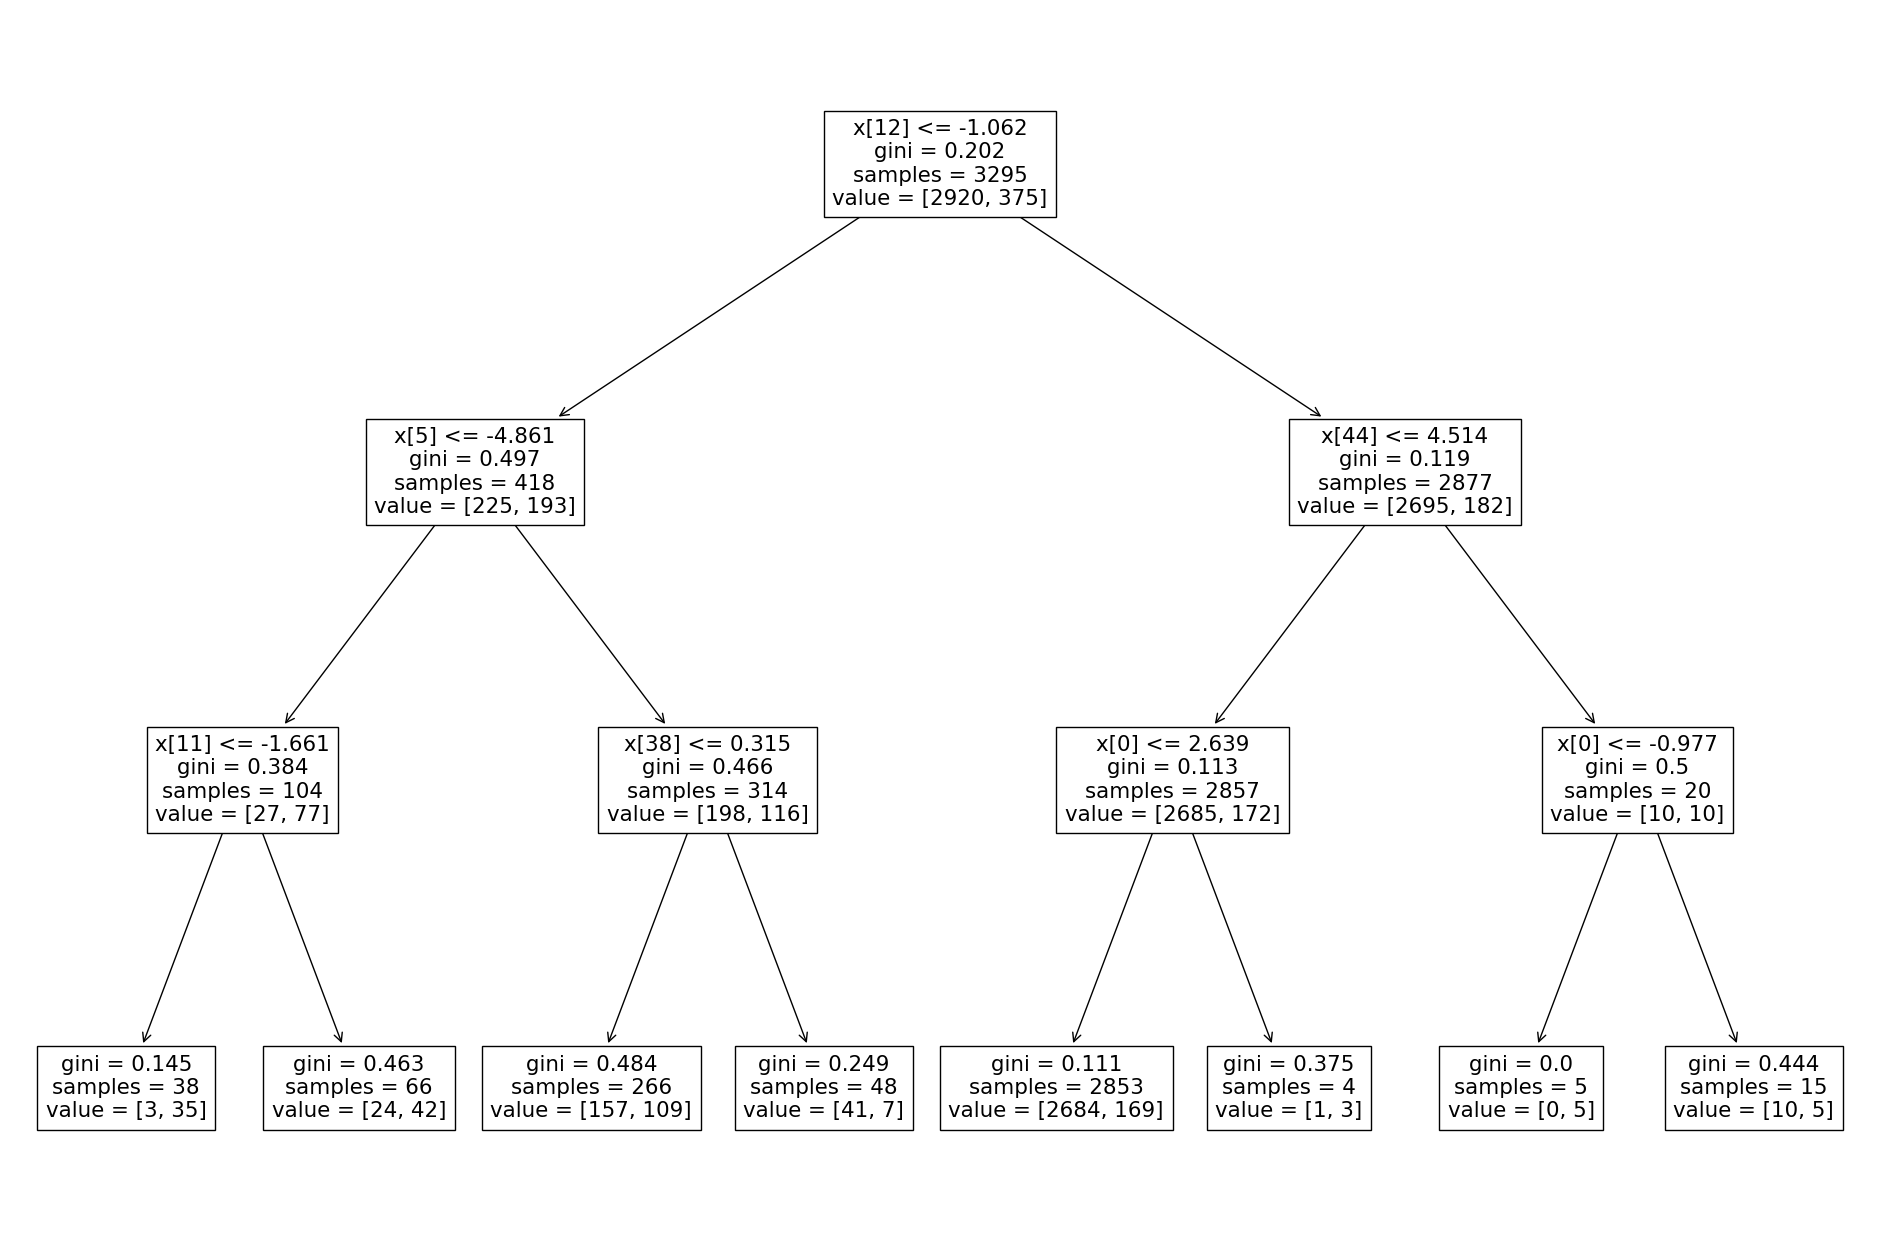

In [120]:
#max_depth=3 olduğu için 3 katmanlı oldu
plt.figure(figsize=(24,16))

from sklearn import  tree

tree.plot_tree(clf_gini.fit(X_train, y_train))
plt.show()

In [121]:
#X[12] ifadesi dataset'in 12. kolonu (değişkeni) demek.
X.columns[12]

'nr.employed'

**Decision Tree Classifier (Entropy ile)**

In [124]:
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier modelini criterion entropy index olarak instantiate edelim
clf_ent= DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)
clf_ent.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [126]:
y_pred_ent= clf_ent.predict(X_test)
y_pred_ent_skor= roc_auc_score(y_test, y_pred_ent)
print('Modelin Entropy ile ROC-AUC Skoru: {0:0.4f}'. format(y_pred_ent_skor))

Modelin Entropy ile ROC-AUC Skoru: 0.5670


**Train-Set ve Test Set ROC-AUC değerlerini karşılaştıralım:**

In [127]:
#yine overfit kontrolü için train ile predict yapılır.
y_pred_train_ent = clf_ent.predict(X_train)
y_pred_train_ent_skor = roc_auc_score(y_train, y_pred_train_ent)
print('Modelin Entropy ile ROC-AUC Skoru: {0:0.4f}'. format(y_pred_train_ent_skor))

Modelin Entropy ile ROC-AUC Skoru: 0.5980


In [128]:
# training ve test set skorları

print('Train set skoru: {:.4f}'.format(y_pred_train_ent_skor))
print('Test set skoru: {:.4f}'.format(y_pred_ent_skor))

Train set skoru: 0.5980
Test set skoru: 0.5670


Görüldüğü gibi Train ve Test Data üzerinde ROC-AUC skoru çok yakın sonuç verdi. (%60, %57)

Overfitting tehlikesi görünmüyor.

**Decision Tree'yi Görselleştirelim**

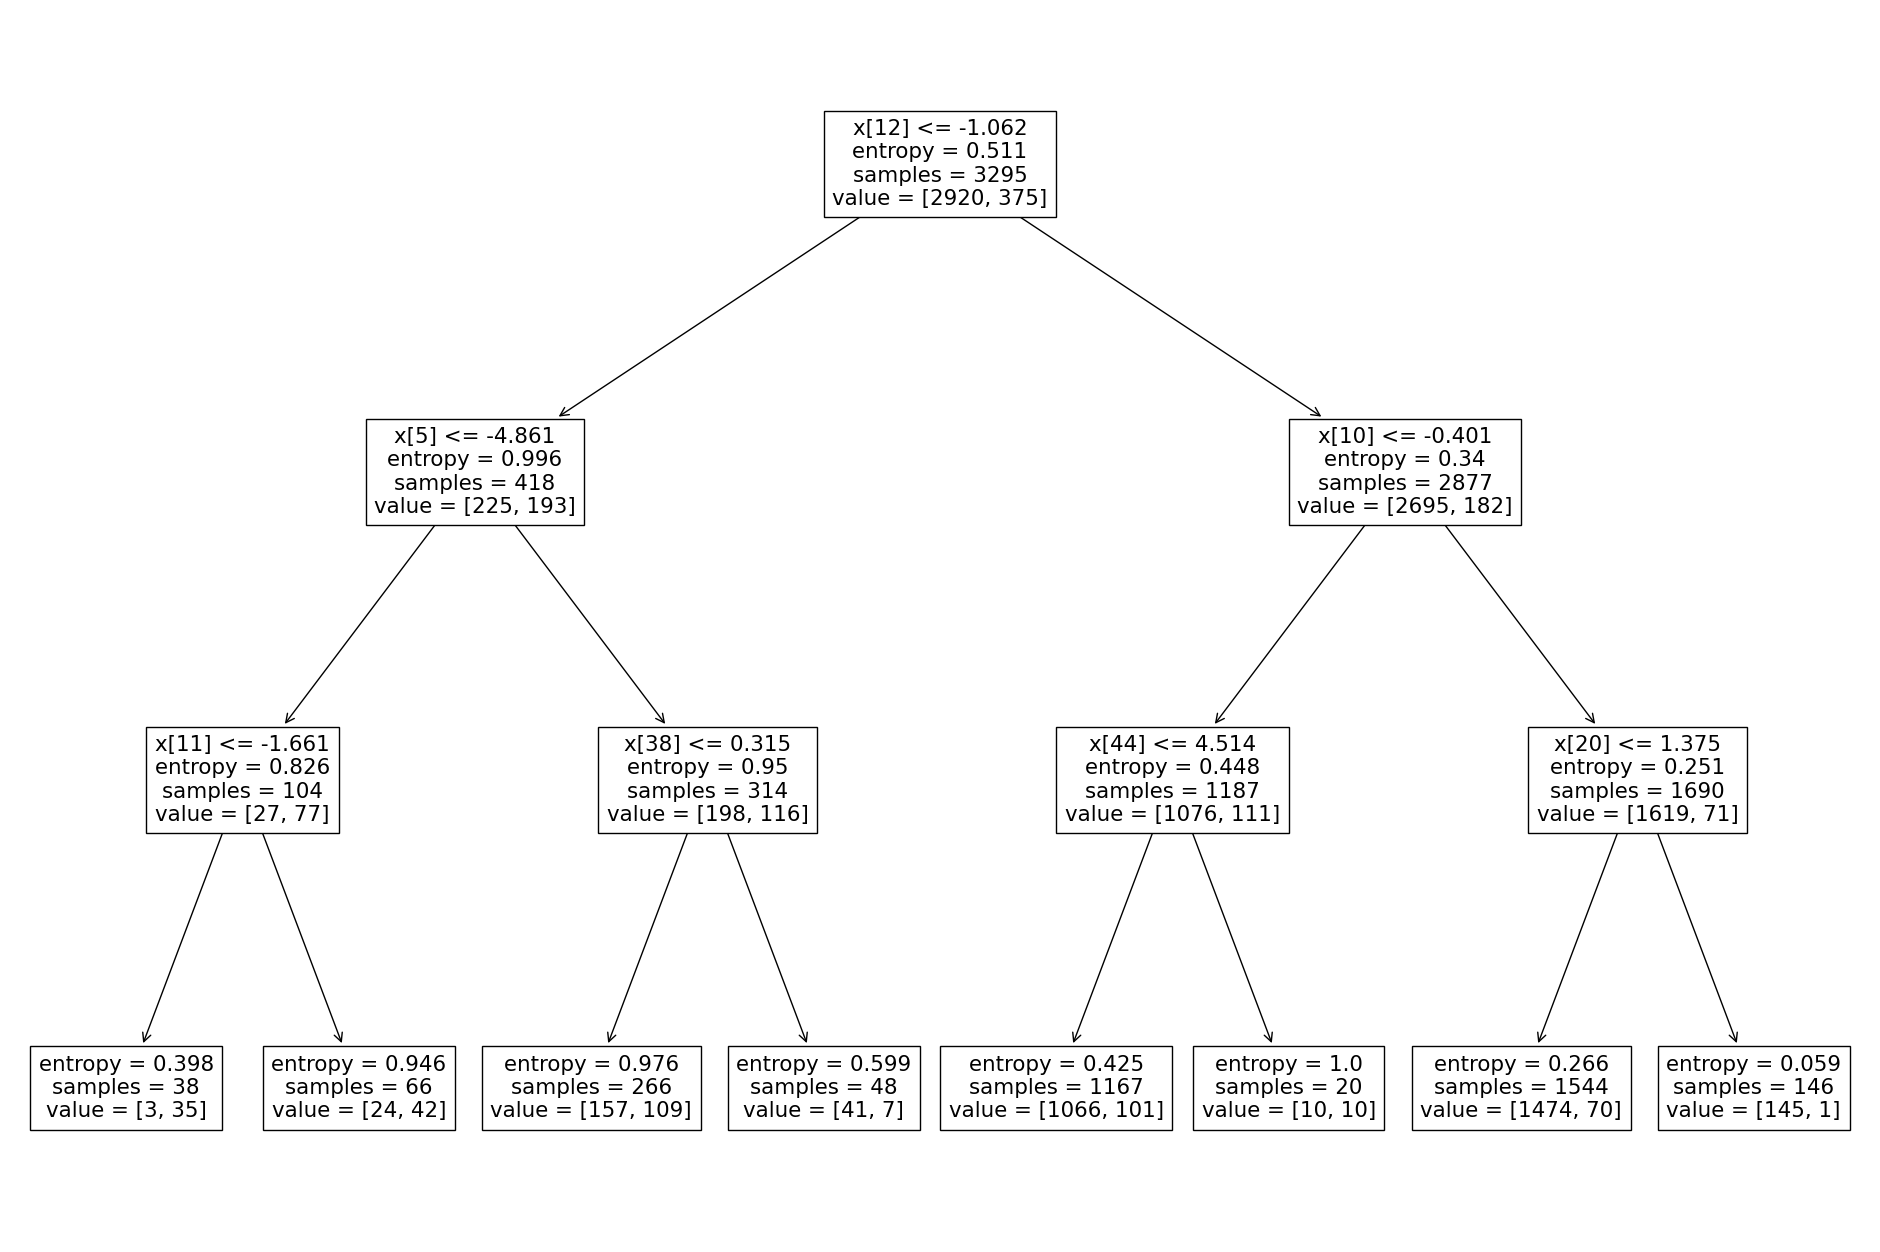

In [129]:
plt.figure(figsize=(24,16))
from sklearn import tree
tree.plot_tree(clf_ent.fit(X_train,y_train))
plt.show()

**Overfit Ispatı (Gini Index)**

Decision Tree'lerde eğer tree derinliğini artırırsanız çok çabuk Overfit olurlar.

Biraz önce max_depth=3 olarak vermiştik şimdi max_depth=9 verelim.

In [131]:
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier modelini criterion gini index olarak instantiate edelim
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=9, random_state=0)

# model'i fit edelim
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=0)

In [132]:
y_pred_gini = clf_gini.predict(X_test)


In [133]:
from sklearn.metrics import roc_auc_score
y_pred_gini_skor = roc_auc_score(y_test, y_pred_gini)
print('Modelin Gini Index ile ROC-AUC Skoru: {0:0.4f}'. format(y_pred_gini_skor))

Modelin Gini Index ile ROC-AUC Skoru: 0.5859


**Train-Set ve Test Set ROC-AUC değerlerini karşılaştıralım**

In [134]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini_skor = roc_auc_score(y_train, y_pred_train_gini)
print('Modelin Gini Index ile ROC-AUC Skoru: {0:0.4f}'. format(y_pred_train_gini_skor))

Modelin Gini Index ile ROC-AUC Skoru: 0.7388


In [135]:
# training ve test set skorları

print('Train set skoru: {:.4f}'.format(y_pred_train_gini_skor))
print('Test set skoru: {:.4f}'.format(y_pred_gini_skor))

Train set skoru: 0.7388
Test set skoru: 0.5859


Görüldüğü gibi Train ve Test Data üzerinde ROC-AUC skoru farklı sonuçlar verdi. (%74, %59)

Overfitting kendisini göstermeye başladı.

**Decision Tree'yi Görselleştirelim**

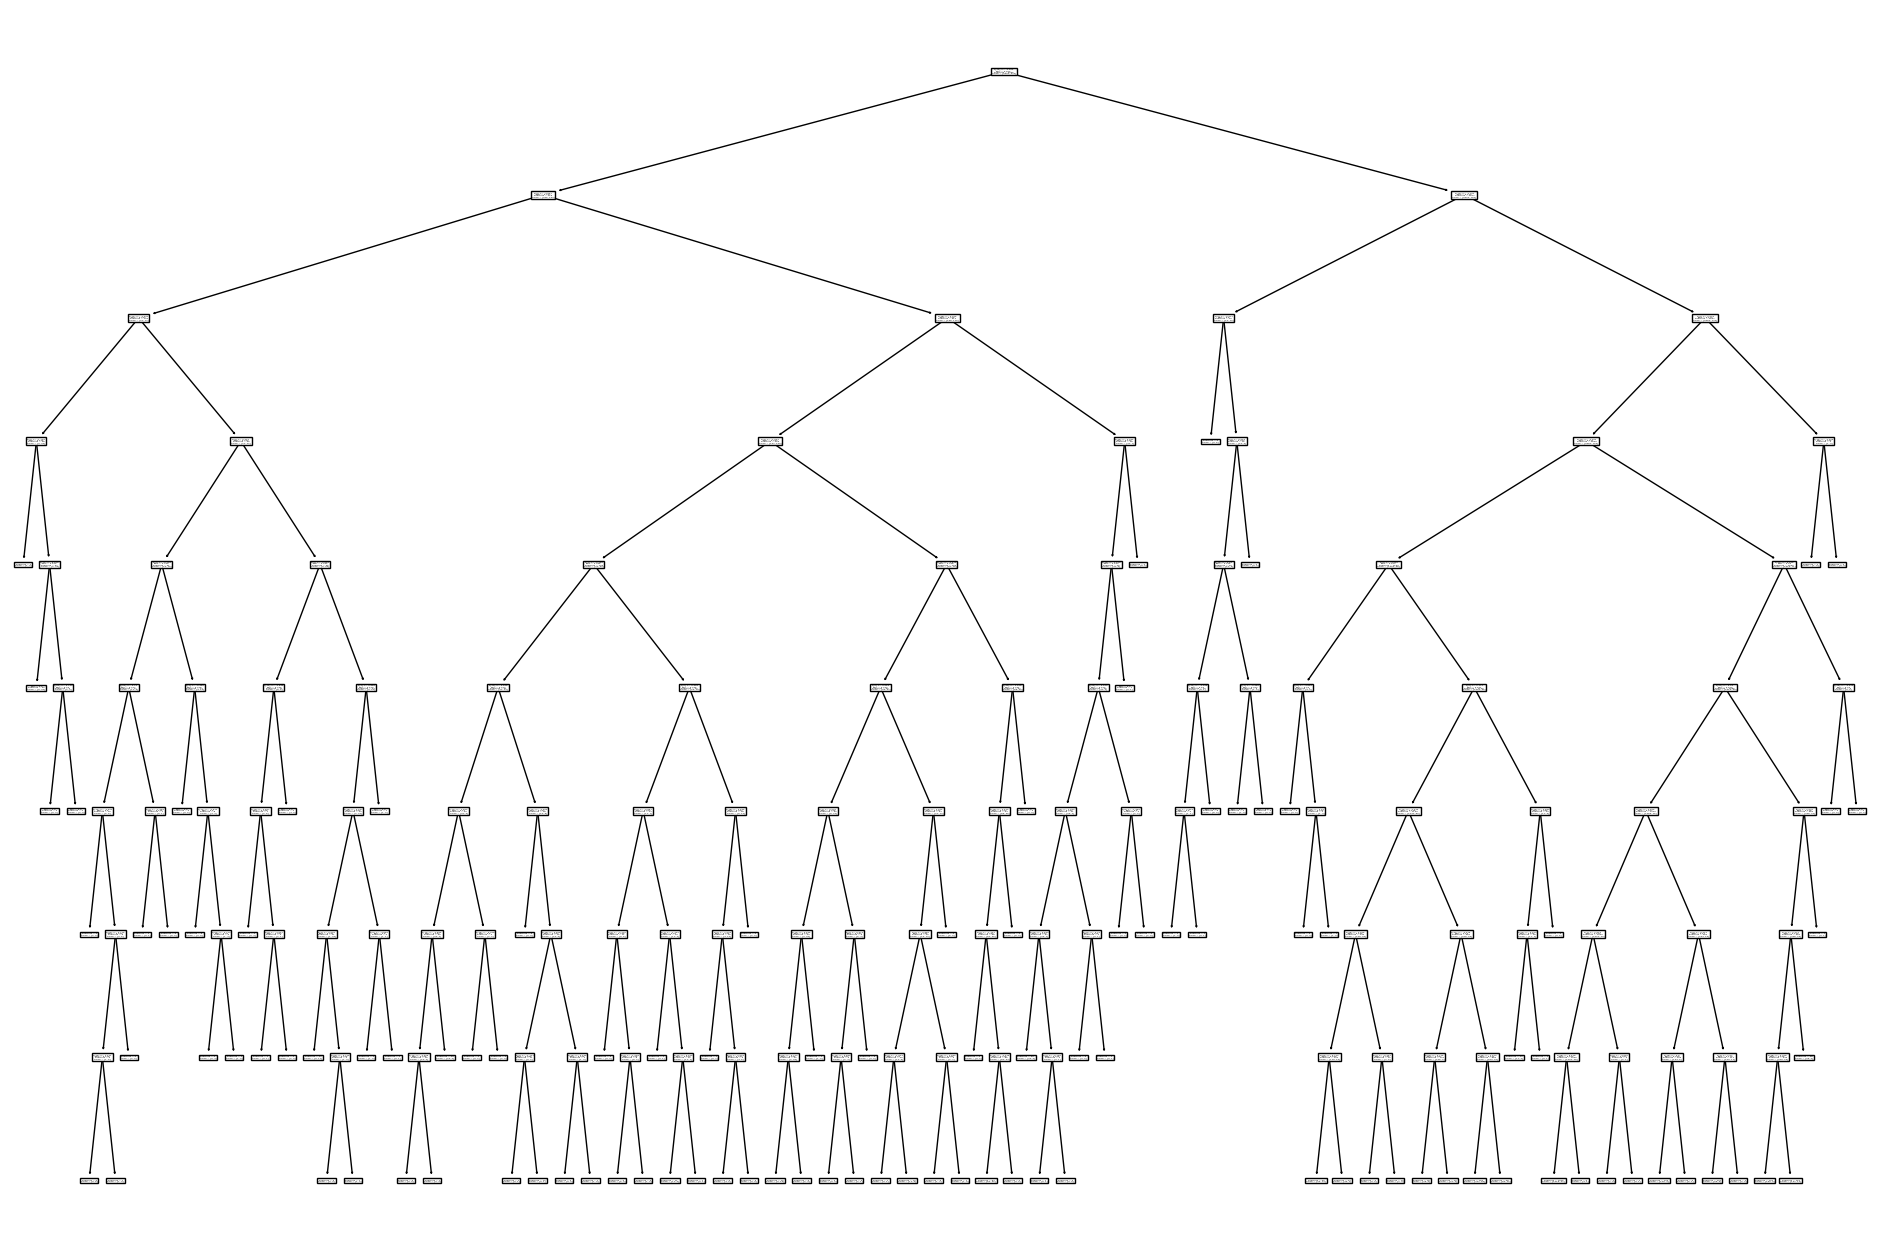

In [136]:
plt.figure(figsize=(24,16))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

plt.show()

sonuç olarak max_depth 9da overfit olur ordan sonrasını yapmayın. Train iyi bi sonuç versede testte vermez.